In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
from pycontractions import Contractions
import gensim.downloader as api

In [2]:
#Import South Park Script
southpark = pd.read_csv("All-seasons.csv")
southpark.head()

,Season,Episode,Character,Line
0,1,1,Boys,"School day, school day, teacher's golden ru...\n"
1,1,1,Kyle,"Ah, damn it! My little brother's trying to fol..."
2,1,1,Ike,Zeeponanner.\n
3,1,1,Kyle,"Ike, you can't come to school with me. \n"
4,1,1,Cartman,"Yeah, go home you little dildo.\n"


In [3]:
#Dialogue spoken by Cartman
sta = southpark['Character'] == 'Stan'
stan = southpark[sta]
stan.head()

,Season,Episode,Character,Line
6,1,1,Stan,What's a dildo?\n
11,1,1,Stan,"What's a dildo, Kenny?\n"
14,1,1,Stan,"Dude, that kicks ass!\n"
18,1,1,Stan,"Whoa, Cartman! Looks like you didn't get much ..."
22,1,1,Stan,Dude! Visitors!\n


In [4]:
#Reset index
stan = stan.reset_index(drop=True)
stan.head()

,Season,Episode,Character,Line
0,1,1,Stan,What's a dildo?\n
1,1,1,Stan,"What's a dildo, Kenny?\n"
2,1,1,Stan,"Dude, that kicks ass!\n"
3,1,1,Stan,"Whoa, Cartman! Looks like you didn't get much ..."
4,1,1,Stan,Dude! Visitors!\n


In [5]:
# Expand Contractions
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
stan['Line_process'] = stan['Line'].apply(decontracted)
stan['Line_process'].head(25)

0                                    What is a dildo?\n
1                             What is a dildo, Kenny?\n
2                               Dude, that kicks ass!\n
3     Whoa, Cartman! Looks like you did not get much...
4                                     Dude! Visitors!\n
5     That was not a dream Cartman, those were visit...
6                                  Visitors are real.\n
7             What is gonna be for lunch today, Chef?\n
8                        They took him on their ship.\n
9     Dude, they did, huh? Aliens stuck stuff up you...
10                       Good morning, Miss Crabtree.\n
11                        Oh, do not worry about him.\n
12                      Yeah, whatever, ya fat bitch.\n
13                          I said I have a bad itch.\n
14                                          Visitors!\n
15      Cartman, are those the same visitors you saw?\n
16    Well, we can not do anything for now, that fat...
17               Uh, I said that rabbits eat let

In [6]:
#Lowercase
stan['Line_process'] = stan['Line_process'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stan['Line_process'].head(25)

0                                      what is a dildo?
1                               what is a dildo, kenny?
2                                 dude, that kicks ass!
3     whoa, cartman! looks like you did not get much...
4                                       dude! visitors!
5     that was not a dream cartman, those were visit...
6                                    visitors are real.
7               what is gonna be for lunch today, chef?
8                          they took him on their ship.
9     dude, they did, huh? aliens stuck stuff up you...
10                         good morning, miss crabtree.
11                          oh, do not worry about him.
12                        yeah, whatever, ya fat bitch.
13                            i said i have a bad itch.
14                                            visitors!
15        cartman, are those the same visitors you saw?
16    well, we can not do anything for now, that fat...
17                 uh, i said that rabbits eat l

In [7]:
#Remove Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
stan['Line_process'] = stan['Line_process'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
stan['Line_process'].head(25)

0                                                dildo?
1                                         dildo, kenny?
2                                      dude, kicks ass!
3     whoa, cartman! looks like get much sleep last ...
4                                       dude! visitors!
5                              dream cartman, visitors!
6                                        visitors real.
7                              gonna lunch today, chef?
8                                            took ship.
9               dude, did, huh? aliens stuck stuff ass!
10                         good morning, miss crabtree.
11                                       oh, worry him.
12                        yeah, whatever, ya fat bitch.
13                                       said bad itch.
14                                            visitors!
15                               cartman, visitors saw?
16                well, anything now, fat bitch let us.
17                        uh, said rabbits eat l

In [8]:
#Remove Punctuation
stan['Line_process'] = stan['Line_process'].str.replace('[^\w\s]','')
stan['Line_process'].head(25)

0                                                 dildo
1                                           dildo kenny
2                                        dude kicks ass
3     whoa cartman looks like get much sleep last night
4                                         dude visitors
5                                dream cartman visitors
6                                         visitors real
7                                gonna lunch today chef
8                                             took ship
9                   dude did huh aliens stuck stuff ass
10                           good morning miss crabtree
11                                         oh worry him
12                           yeah whatever ya fat bitch
13                                        said bad itch
14                                             visitors
15                                 cartman visitors saw
16                   well anything now fat bitch let us
17                          uh said rabbits eat 

In [9]:
#Tokenize
stan['word_tokens'] = stan['Line_process'].apply(word_tokenize)
stan['sent_tokens'] = stan['Line'].apply(sent_tokenize)

In [10]:
stan['word_tokens'].head(25)

0                                               [dildo]
1                                        [dildo, kenny]
2                                    [dude, kicks, ass]
3     [whoa, cartman, looks, like, get, much, sleep,...
4                                      [dude, visitors]
5                            [dream, cartman, visitors]
6                                      [visitors, real]
7                         [gon, na, lunch, today, chef]
8                                          [took, ship]
9           [dude, did, huh, aliens, stuck, stuff, ass]
10                      [good, morning, miss, crabtree]
11                                     [oh, worry, him]
12                     [yeah, whatever, ya, fat, bitch]
13                                    [said, bad, itch]
14                                           [visitors]
15                             [cartman, visitors, saw]
16           [well, anything, now, fat, bitch, let, us]
17                    [uh, said, rabbits, eat, l

In [11]:
#Lemmatize
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
stan['word_tokens'].apply(lemmatize_text).head(25)

0                                               [dildo]
1                                        [dildo, kenny]
2                                      [dude, kick, as]
3     [whoa, cartman, look, like, get, much, sleep, ...
4                                       [dude, visitor]
5                             [dream, cartman, visitor]
6                                       [visitor, real]
7                         [gon, na, lunch, today, chef]
8                                          [took, ship]
9             [dude, did, huh, alien, stuck, stuff, as]
10                      [good, morning, miss, crabtree]
11                                     [oh, worry, him]
12                     [yeah, whatever, ya, fat, bitch]
13                                    [said, bad, itch]
14                                            [visitor]
15                              [cartman, visitor, saw]
16            [well, anything, now, fat, bitch, let, u]
17                     [uh, said, rabbit, eat, l

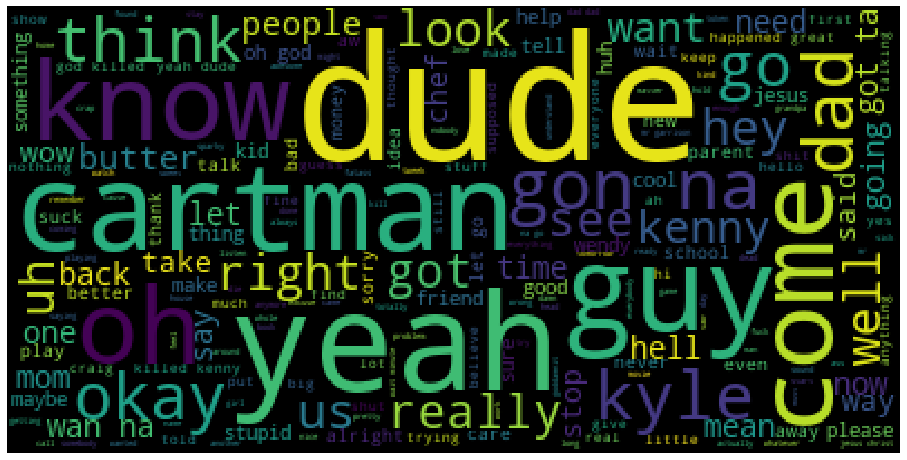

In [12]:
#Wordcloud
wordcloud_cartman = WordCloud().generate(stan['word_tokens'].to_string())
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud_cartman)
plt.axis("off")
plt.savefig('Stan_Wordcloud.png')
plt.show()

In [13]:
#Bag of Word Model
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vec = CountVectorizer().fit(stan['Line_process'])
bag_of_words = vec.transform(stan['Line_process'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = np.array(sorted(words_freq, key = lambda x: x[1], reverse=True))

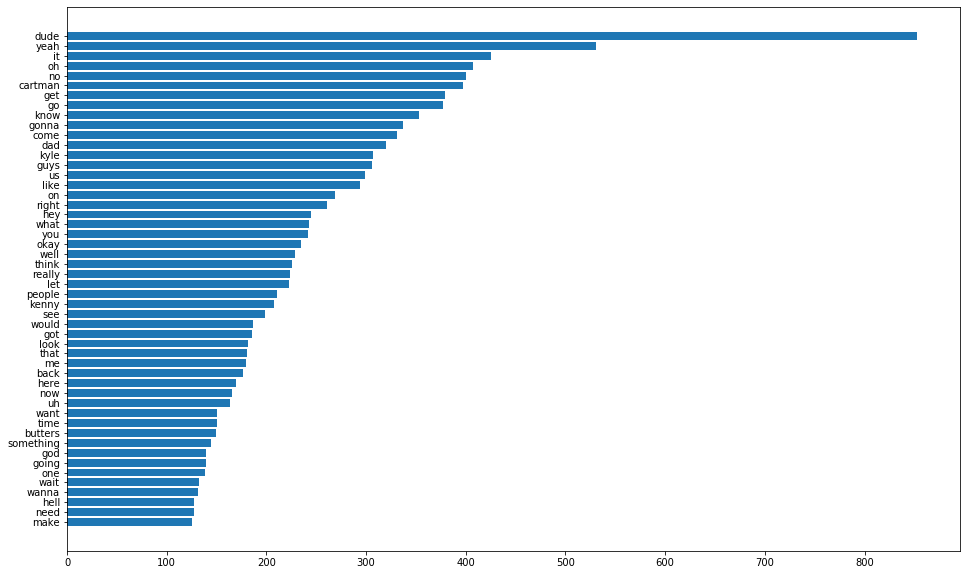

In [15]:
n = 50
plt.figure(figsize=(16, 10))
plt.barh(-np.arange(n), words_freq[:n, 1].astype(float), height=.8)
plt.yticks(ticks=-np.arange(n), labels=words_freq[:n, 0])
plt.savefig('Stan_BOW.png')
plt.show()

In [16]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer  
vect = TfidfVectorizer().fit(stan['Line_process'])
tfidf = vect.transform(stan['Line_process'])
sum_tfidf = tfidf.sum(axis=0)
tfidf_freq = [(word, sum_tfidf[0, idx]) for word, idx in vect.vocabulary_.items()]
tfidf_freq = np.array(sorted(tfidf_freq, key = lambda x: x[1], reverse=True))

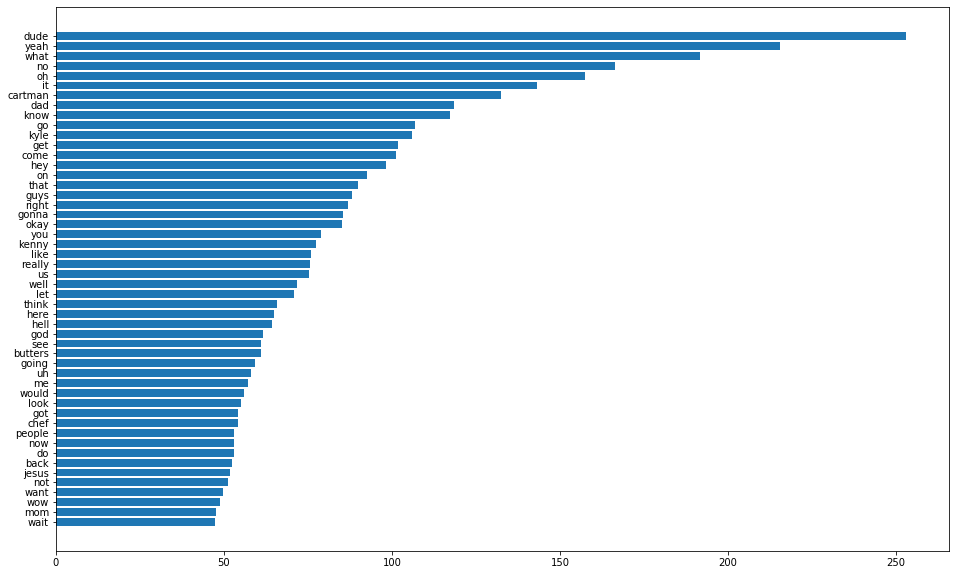

In [17]:
n = 50
plt.figure(figsize=(16, 10))
plt.barh(-np.arange(n), tfidf_freq[:n, 1].astype(float), height=.8)
plt.yticks(ticks=-np.arange(n), labels=tfidf_freq[:n, 0])
plt.savefig('Stan_TFIDF.png')
plt.show()